In [2]:
!pip install tensorflow

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dataset_path = r"/content/drive/MyDrive/Colab Notebooks/K_IVP_Proj/Train"

val_dataset_path = r"/content/drive/MyDrive/Colab Notebooks/K_IVP_Proj/val"

In [5]:
img_height, img_width = 224, 224
batch_size = 32

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    train_dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    val_dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [7]:
print("🔢 Total training images   :", train_data.samples)
print("🔍 Total validation images :", val_data.samples)
print("📂 Classes:", train_data.class_indices)

🔢 Total training images   : 160
🔍 Total validation images : 40
📂 Classes: {'Dermatofibroma': 0, 'Melanocytic nevus': 1}


In [8]:
num_classes = len(train_data.class_indices)

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 49s 10s/step - accuracy: 0.4207 - loss: 1.4457 - val_accuracy: 0.5000 - val_loss: 0.6597
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6010 - loss: 0.7006 - val_accuracy: 0.8750 - val_loss: 0.5678
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6771 - loss: 0.6454 - val_accuracy: 0.8250 - val_loss: 0.4443
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.8871 - loss: 0.3940 - val_accuracy: 0.5750 - val_loss: 0.7875
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7057 - loss: 0.5256 - val_accuracy: 0.6750 - val_loss: 1.2197


In [12]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.6750 - loss: 1.3591
Validation Accuracy: 0.70


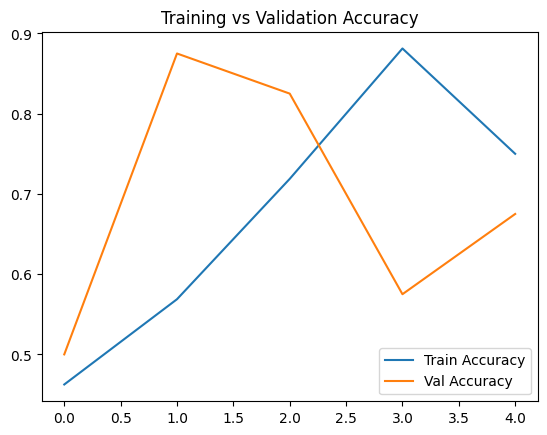

In [13]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [14]:
val_data.reset()
y_true = val_data.classes
y_pred = np.argmax(model.predict(val_data), axis=1)

# Only include classes that actually appear in y_true
unique_class_indices = np.unique(y_true)
index_to_class = {v: k for k, v in val_data.class_indices.items()}
target_names = [index_to_class[i] for i in unique_class_indices]

# Now this will work correctly
print(classification_report(y_true, y_pred, target_names=target_names))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
                   precision    recall  f1-score   support

   Dermatofibroma       1.00      0.35      0.52        20
Melanocytic nevus       0.61      1.00      0.75        20

         accuracy                           0.68        40
        macro avg       0.80      0.68      0.64        40
     weighted avg       0.80      0.68      0.64        40



In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import pandas as pd

In [16]:
val_data.reset()
y_true = val_data.classes
y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)

class_labels = list(val_data.class_indices.keys())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step


In [17]:
val_data.reset()
y_true = val_data.classes
y_pred = np.argmax(model.predict(val_data), axis=1)

# Map class index to label name
index_to_class = {v: k for k, v in val_data.class_indices.items()}

# Only include class labels that actually appear in y_true
unique_class_indices = np.unique(y_true)
class_labels = [index_to_class[i] for i in unique_class_indices]

# Print report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
Classification Report:
                   precision    recall  f1-score   support

   Dermatofibroma       1.00      0.35      0.52        20
Melanocytic nevus       0.61      1.00      0.75        20

         accuracy                           0.68        40
        macro avg       0.80      0.68      0.64        40
     weighted avg       0.80      0.68      0.64        40



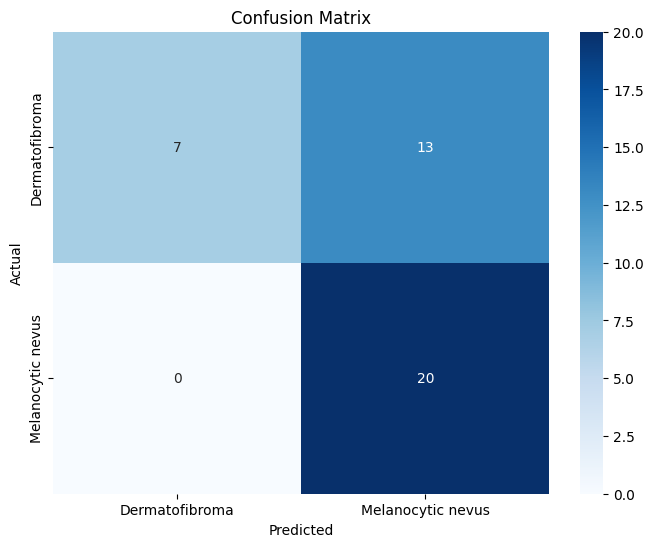

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.6750


In [21]:
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"\nMacro Precision: {precision_macro:.4f}, Macro Recall: {recall_macro:.4f}, Macro F1-score: {f1_macro:.4f}")
print(f"Weighted Precision: {precision_weighted:.4f}, Weighted Recall: {recall_weighted:.4f}, Weighted F1-score: {f1_weighted:.4f}")


Macro Precision: 0.8030, Macro Recall: 0.6750, Macro F1-score: 0.6366
Weighted Precision: 0.8030, Weighted Recall: 0.6750, Weighted F1-score: 0.6366


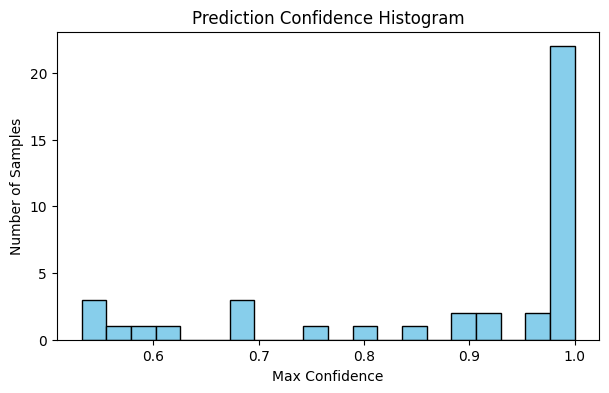

In [22]:
confidences = np.max(y_pred_probs, axis=1)
plt.figure(figsize=(7, 4))
plt.hist(confidences, bins=20, color='skyblue', edgecolor='black')
plt.title("Prediction Confidence Histogram")
plt.xlabel("Max Confidence")
plt.ylabel("Number of Samples")
plt.show()


In [23]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print("\n" + "="*40)
print("FINAL ACCURACIES")
print("="*40)
print(f"Training Accuracy   : {final_train_acc * 100:.4f} %")
print(f"Validation Accuracy : {final_val_acc * 100:.4f} %")
print("="*40)



FINAL ACCURACIES
Training Accuracy   : 75.0000 %
Validation Accuracy : 67.5000 %


In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your local image
img_path = "/content/drive/MyDrive/Colab Notebooks/K_IVP_Proj/test/ISIC_0000057_downsampled.jpg"  # change to your image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using the model
prediction = model.predict(img_array)
predicted_class_idx = np.argmax(prediction)
confidence = prediction[0][predicted_class_idx] * 100

# Decode class index to label
class_indices = train_data.class_indices
inv_class_indices = {v: k for k, v in class_indices.items()}
predicted_label = inv_class_indices[predicted_class_idx]

# Print the result
print(f"✅ Predicted Class: {predicted_label}")
print(f"📊 Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
✅ Predicted Class: Melanocytic nevus
📊 Confidence: 99.92%


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5269 - loss: 1.1074 - val_accuracy: 0.5500 - val_loss: 0.7338
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5370 - loss: 0.8700 - val_accuracy: 0.7000 - val_loss: 0.6364
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6217 - loss: 0.7615 - val_accuracy: 0.7500 - val_loss: 0.5607
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6827 - loss: 0.6421 - val_accuracy: 0.7750 - val_loss: 0.5008
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7056 - loss: 0.7147 - val_accuracy: 0.7250 - val_loss: 0.4524
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step

Classification Report:
                    precision    recall  f1-score   support

   Dermatofibroma       0.71      0.75      0.73        20
Melanocytic nevus       0.74      0.70      0.72        20

         accuracy                           0.72        40
        macro avg       0.73      0.72      0.72        40
     weighted avg       0.7

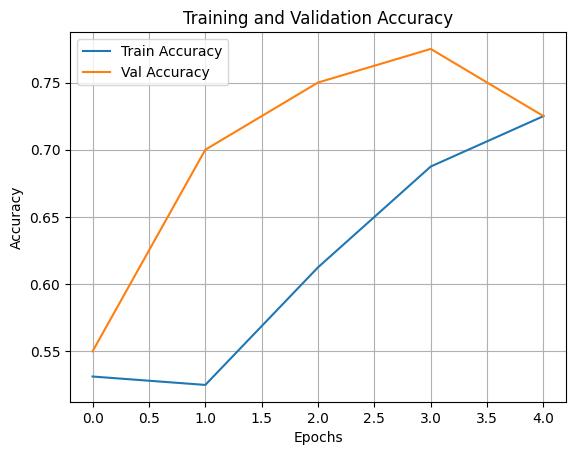

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Paths
train_path = "/content/drive/MyDrive/Colab Notebooks/K_IVP_Proj/Train"
val_path = "/content/drive/MyDrive/Colab Notebooks/K_IVP_Proj/val"
img_height, img_width = 224, 224
batch_size = 32

# ✅ Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_path, target_size=(img_height, img_width),
                                               batch_size=batch_size, class_mode='categorical', shuffle=True)
val_data = val_datagen.flow_from_directory(val_path, target_size=(img_height, img_width),
                                           batch_size=batch_size, class_mode='categorical', shuffle=False)

# ✅ Model
num_classes = len(train_data.class_indices)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train
history = model.fit(train_data, validation_data=val_data, epochs=5)

# ✅ Evaluation
val_data.reset()
preds = model.predict(val_data)
y_pred = np.argmax(preds, axis=1)
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

# ✅ Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()




In [32]:
# ✅ Single Image Prediction
test_img_path = '/content/drive/MyDrive/Colab Notebooks/K_IVP_Proj/test/ISIC_0000001.jpg'  # Change this path to your test image
img = load_img(test_img_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]
print(f"\n🔍 Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   

🔍 Predicted Class: Melanocytic nevus


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

🚀 Training Model: MobileNetV2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5190 - loss: 1.0538 - val_accuracy: 0.6250 - val_loss: 0.6714
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6280 - loss: 0.7511 - val_accuracy: 0.6750 - val_loss: 0.6035
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7332 - loss: 0.5837 - val_accuracy: 0.7250 - val_loss: 0.5922
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step

📊 Classification Report for MobileNetV2:
                    precision    recall  f1-score   support

   Dermatofibroma       0.65      1.00      0.78        20
Melanocytic nevus       1.00      0.45      0.62        20

         accuracy                           0.72        40
        macro avg       0.82      0.72      0.70        40
     weighted avg       0.82      0.72      0.70        40



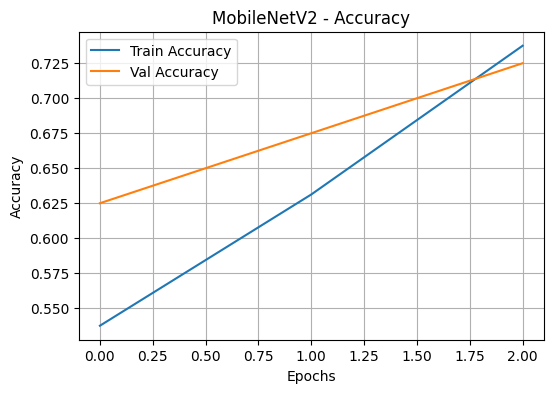

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
🔍 MobileNetV2 Prediction: Dermatofibroma (82.49% confidence)

🚀 Training Model: EfficientNetB0
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.5246 - loss: 0.7362 - val_accuracy: 0.5000 - val_loss: 0.6962
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.4934 - loss: 0.7272 - val_accuracy: 0.5000 - val_loss: 0.7052
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4974 - loss: 0.7040 - val_accuracy: 0.5000 - val_loss: 0.6979
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step

📊 Classification Report for EfficientNetB0:
                    precision    recall  f1-score   support

   Dermatofibroma       0.00      0.00      0.00        20
Melanocytic nevus       0.50      1.00      0.67        20

         accuracy                           0.50        40
        macro avg       0.25      0.50      0.33        40
     weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


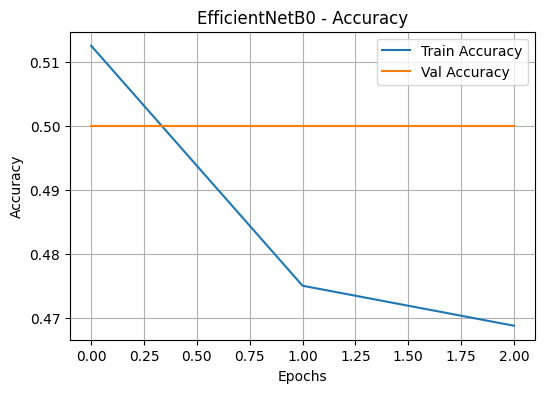

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🔍 EfficientNetB0 Prediction: Melanocytic nevus (55.00% confidence)

🚀 Training Model: ResNet50
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 8s/step - accuracy: 0.4738 - loss: 0.8001 - val_accuracy: 0.4750 - val_loss: 0.6933
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step - accuracy: 0.5032 - loss: 0.7576 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.3938 - loss: 0.8878 - val_accuracy: 0.5000 - val_loss: 0.6998
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step

📊 Classification Report for ResNet50:
                    precision    recall  f1-score   support

   Dermatofibroma       0.50      1.00      0.67        20
Melanocytic nevus       0.00      0.00      0.00        20

         accuracy                           0.50        40
        macro avg       0.25      0.50      0.33        40
     weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


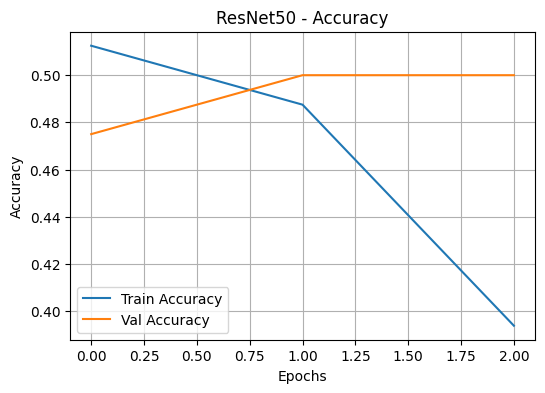

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🔍 ResNet50 Prediction: Dermatofibroma (55.66% confidence)

🚀 Training Model: DenseNet121
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 59s 10s/step - accuracy: 0.5070 - loss: 1.1507 - val_accuracy: 0.5500 - val_loss: 0.6944
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.5077 - loss: 0.8739 - val_accuracy: 0.6000 - val_loss: 0.6752
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.6157 - loss: 0.7249 - val_accuracy: 0.6000 - val_loss: 0.6795
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step

📊 Classification Report for DenseNet121:
                    precision    recall  f1-score   support

   Dermatofibroma       0.67      0.40      0.50        20
Melanocytic nevus       0.57      0.80      0.67        20

         accuracy                           0.60        40
        macro avg       0.62      0.60      0.58        40
     weighted avg       0.62      0.60      0.58        40



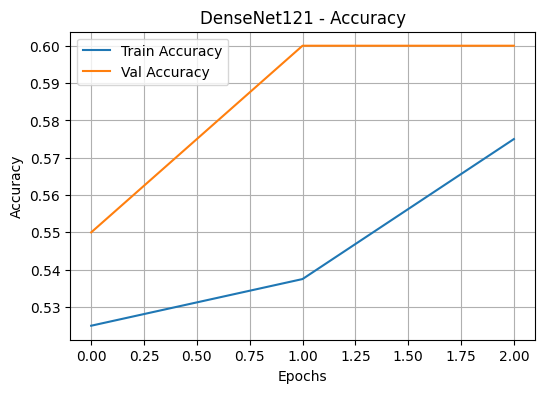

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
🔍 DenseNet121 Prediction: Melanocytic nevus (73.98% confidence)

🚀 Training Model: Xception
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - accuracy: 0.5735 - loss: 0.6720 - val_accuracy: 0.7500 - val_loss: 0.5817
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 8s/step - accuracy: 0.7124 - loss: 0.5899 - val_accuracy: 0.8250 - val_loss: 0.5201
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 8s/step - accuracy: 0.7393 - loss: 0.5519 - val_accuracy: 0.8750 - val_loss: 0.4666
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step

📊 Classification Report for Xception:
                    precision    recall  f1-score   support

   Dermatofibroma       0.89      0.85      0.87        20
Melanocytic nevus       0.86      0.90      0.88        20

         accuracy                           0.88        40
        macro avg       0.88      0.88      0.87        40
     weighted avg       0.88      0.88      0.87        40



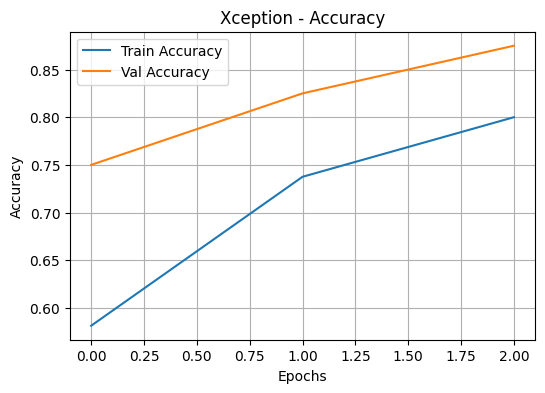

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🔍 Xception Prediction: Melanocytic nevus (64.89% confidence)


In [34]:
# ✅ INSTALL DEPENDENCIES
!pip install -q tensorflow

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# ✅ DATA PATHS
train_path = "/content/drive/MyDrive/Colab Notebooks/K_IVP_Proj/Train"
val_path = "/content/drive/MyDrive/Colab Notebooks/K_IVP_Proj/val"
test_img_path = "/content/drive/MyDrive/Colab Notebooks/K_IVP_Proj/test/ISIC_0000001.jpg"
img_height, img_width = 224, 224
batch_size = 32
epochs = 3

# ✅ DATA LOADERS
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_path, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=True)
val_data = val_gen.flow_from_directory(val_path, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

class_labels = list(train_data.class_indices.keys())
num_classes = len(class_labels)

# ✅ MODEL BUILDER
def build_model(base_model):
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ MODELS TO COMPARE
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50, DenseNet121, Xception
model_names = {
    "MobileNetV2": MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
    "EfficientNetB0": EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
    "DenseNet121": DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
    "Xception": Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
}

# ✅ LOOP THROUGH EACH MODEL
for name, base in model_names.items():
    print(f"\n🚀 Training Model: {name}")
    model = build_model(base)
    history = model.fit(train_data, validation_data=val_data, epochs=epochs)

    # ✅ Evaluation
    val_data.reset()
    preds = model.predict(val_data)
    y_pred = np.argmax(preds, axis=1)
    y_true = val_data.classes
    print(f"\n📊 Classification Report for {name}:\n", classification_report(y_true, y_pred, target_names=class_labels))

    # ✅ Plot Accuracy
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{name} - Accuracy')
    plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)
    plt.show()

    # ✅ Single Image Prediction
    img = load_img(test_img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    pred_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    print(f"🔍 {name} Prediction: {class_labels[pred_class]} ({confidence:.2f}% confidence)")



🚀 Training Model: MobileNetV2
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4497 - loss: 0.9317 - val_accuracy: 0.6250 - val_loss: 0.6221
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5526 - loss: 0.8725 - val_accuracy: 0.7750 - val_loss: 0.5378
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5492 - loss: 0.7810 - val_accuracy: 0.8000 - val_loss: 0.4806
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


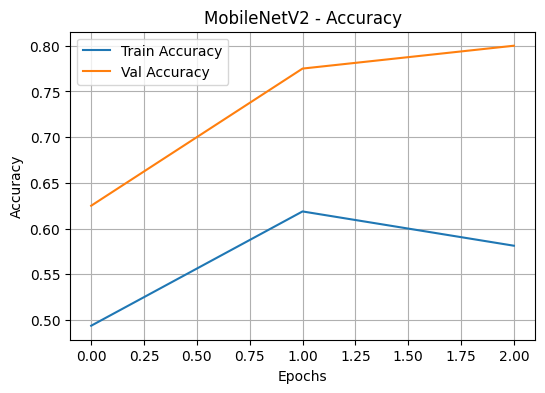

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
🔍 MobileNetV2 Prediction: Melanocytic nevus (67.27% confidence)

🚀 Training Model: EfficientNetB0
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.4370 - loss: 0.7247 - val_accuracy: 0.5000 - val_loss: 0.6986
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.5923 - loss: 0.6864 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4760 - loss: 0.7333 - val_accuracy: 0.5000 - val_loss: 0.6937
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


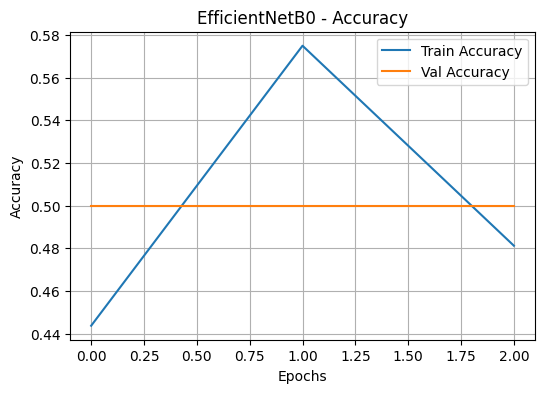

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🔍 EfficientNetB0 Prediction: Melanocytic nevus (50.73% confidence)

🚀 Training Model: ResNet50
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 8s/step - accuracy: 0.4247 - loss: 0.8903 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step - accuracy: 0.4346 - loss: 0.8692 - val_accuracy: 0.5000 - val_loss: 0.7025
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.4924 - loss: 0.7793 - val_accuracy: 0.5000 - val_loss: 0.7053
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


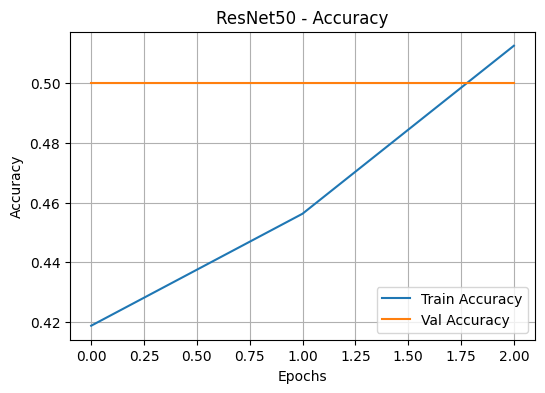

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🔍 ResNet50 Prediction: Dermatofibroma (58.12% confidence)

🚀 Training Model: DenseNet121
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 57s 10s/step - accuracy: 0.5609 - loss: 0.8357 - val_accuracy: 0.6000 - val_loss: 0.6337
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.5918 - loss: 0.7271 - val_accuracy: 0.7000 - val_loss: 0.5878
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.5822 - loss: 0.6860 - val_accuracy: 0.7500 - val_loss: 0.5269
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step


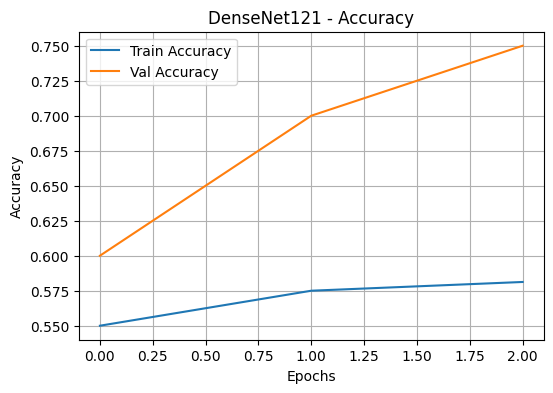

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
🔍 DenseNet121 Prediction: Melanocytic nevus (68.42% confidence)

🚀 Training Model: Xception
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step - accuracy: 0.3635 - loss: 0.8642 - val_accuracy: 0.4500 - val_loss: 0.7302
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 8s/step - accuracy: 0.5608 - loss: 0.7030 - val_accuracy: 0.6500 - val_loss: 0.6469
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step - accuracy: 0.6168 - loss: 0.6142 - val_accuracy: 0.7500 - val_loss: 0.5765
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step


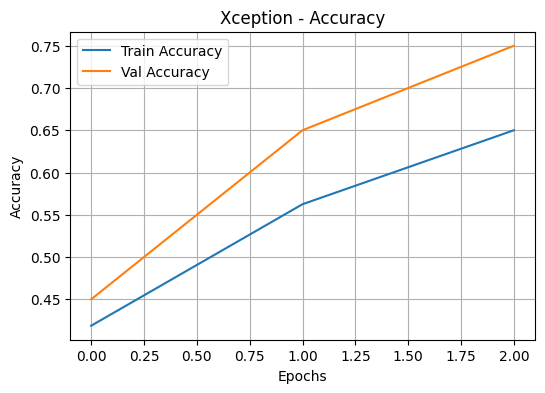

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🔍 Xception Prediction: Melanocytic nevus (71.00% confidence)

📊 Model Comparison Table:

| Model          |   Train Accuracy (Final Epoch) |   Best Val Accuracy |   Precision |   Recall |   F1-Score |
|:---------------|-------------------------------:|--------------------:|------------:|---------:|-----------:|
| MobileNetV2    |                         0.5813 |                0.8  |      0.803  |     0.8  |     0.7995 |
| EfficientNetB0 |                         0.4812 |                0.5  |      0.25   |     0.5  |     0.3333 |
| ResNet50       |                         0.5125 |                0.5  |      0.25   |     0.5  |     0.3333 |
| DenseNet121    |                         0.5813 |                0.75 |      0.7747 |     0.75 |     0.7442 |
| Xception       |                         0.65   |                0.75 |      0.7604 |     0.75 |     0.7475 |


In [35]:
!pip install tabulate

import pandas as pd

# Store metrics for each model
results = []

# ✅ LOOP THROUGH EACH MODEL
for name, base in model_names.items():
    print(f"\n🚀 Training Model: {name}")
    model = build_model(base)
    history = model.fit(train_data, validation_data=val_data, epochs=epochs)

    # ✅ Evaluation
    val_data.reset()
    preds = model.predict(val_data)
    y_pred = np.argmax(preds, axis=1)
    y_true = val_data.classes
    report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

    # ✅ Store best val accuracy and prediction info
    best_val_acc = max(history.history['val_accuracy'])
    final_train_acc = history.history['accuracy'][-1]
    results.append({
        'Model': name,
        'Train Accuracy (Final Epoch)': f"{final_train_acc:.4f}",
        'Best Val Accuracy': f"{best_val_acc:.4f}",
        'Precision': f"{report['weighted avg']['precision']:.4f}",
        'Recall': f"{report['weighted avg']['recall']:.4f}",
        'F1-Score': f"{report['weighted avg']['f1-score']:.4f}"
    })

    # ✅ Plot Accuracy
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{name} - Accuracy')
    plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)
    plt.show()

    # ✅ Single Image Prediction
    img = load_img(test_img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    pred_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    print(f"🔍 {name} Prediction: {class_labels[pred_class]} ({confidence:.2f}% confidence)")

# ✅ Display Comparison Table
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison Table:\n")
print(results_df.to_markdown(index=False))  # If using a notebook, this gives a nice markdown table
